# **Importing Libraries**

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [81]:
data_url = "https://drive.google.com/uc?export=download&id=1OCfBOUyFhu4JfOTL2uDArNdx6XkWQCXA"
df = pd.read_csv(data_url)
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


# **Dataset Description**

In [82]:
df.shape

(1080, 10)

In [83]:
df.describe()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000,1080.000000
mean,51.002410,10.242190,6.500000,2019.000000,99.211787,127.20000,14.724259,65.153704
std,1.576498,2.351316,3.453652,2.583185,57.560449,145.90981,11.433380,20.303775
min,48.135100,6.773500,1.000000,2015.000000,0.000000,6.00000,-5.000000,30.000000
25%,50.110900,8.682100,3.750000,2017.000000,49.500000,37.00000,4.975000,47.000000
50%,51.139050,9.862850,6.500000,2019.000000,99.425000,83.50000,14.850000,66.000000
75%,52.375900,12.373100,9.250000,2021.000000,149.527500,113.00000,24.300000,83.000000
max,53.551100,13.737300,12.000000,2023.000000,199.910000,519.00000,34.900000,99.000000


# **Exploratory Data Analysis**

In [84]:
print(df.columns)


Index(['City', 'Latitude', 'Longitude', 'Month', 'Year', 'Rainfall',
       'Elevation', 'Climate_Type', 'Temperature', 'Humidity'],
      dtype='object')


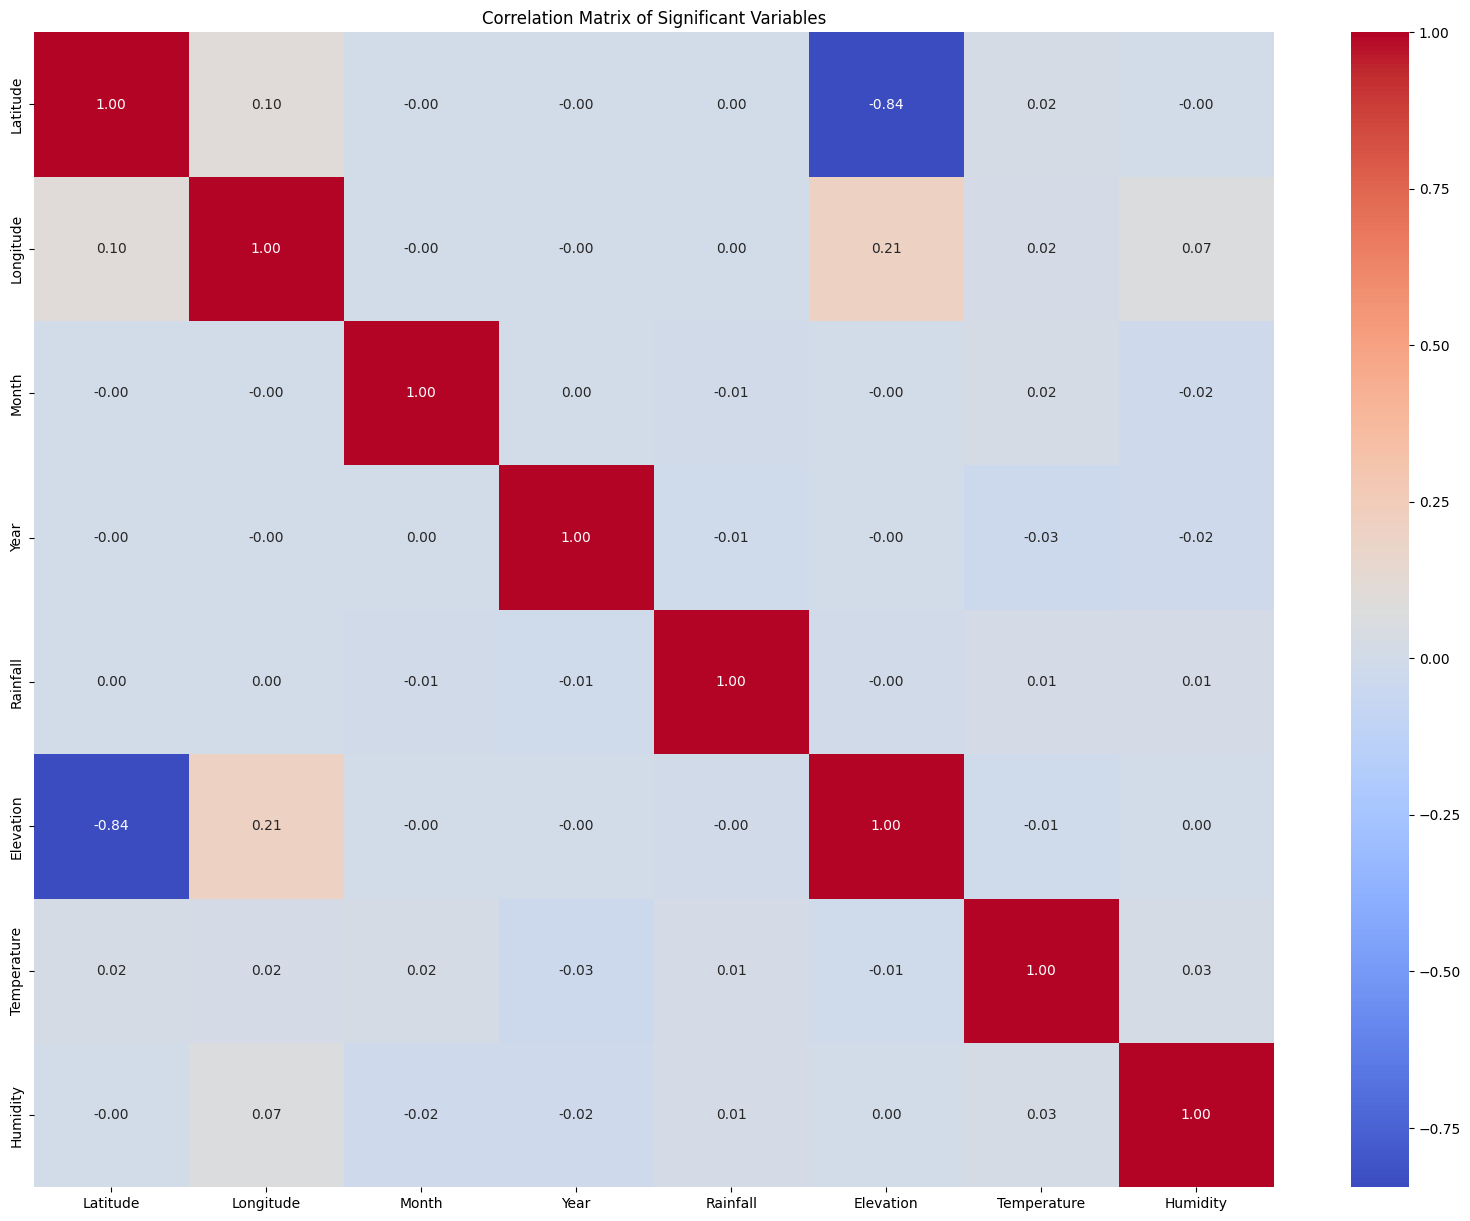

In [87]:
eda_columns = [
    'Latitude',
    'Longitude',
    'Month',
    'Year',
    'Rainfall',
    'Elevation',
    'Temperature',
    'Humidity'
]

# Extract relevant data
eda_data = data[eda_columns]

# Generate summary statistics
summary_stats = eda_data.describe()

# Compute correlation matrix
correlation_matrix = eda_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Significant Variables')
plt.show()

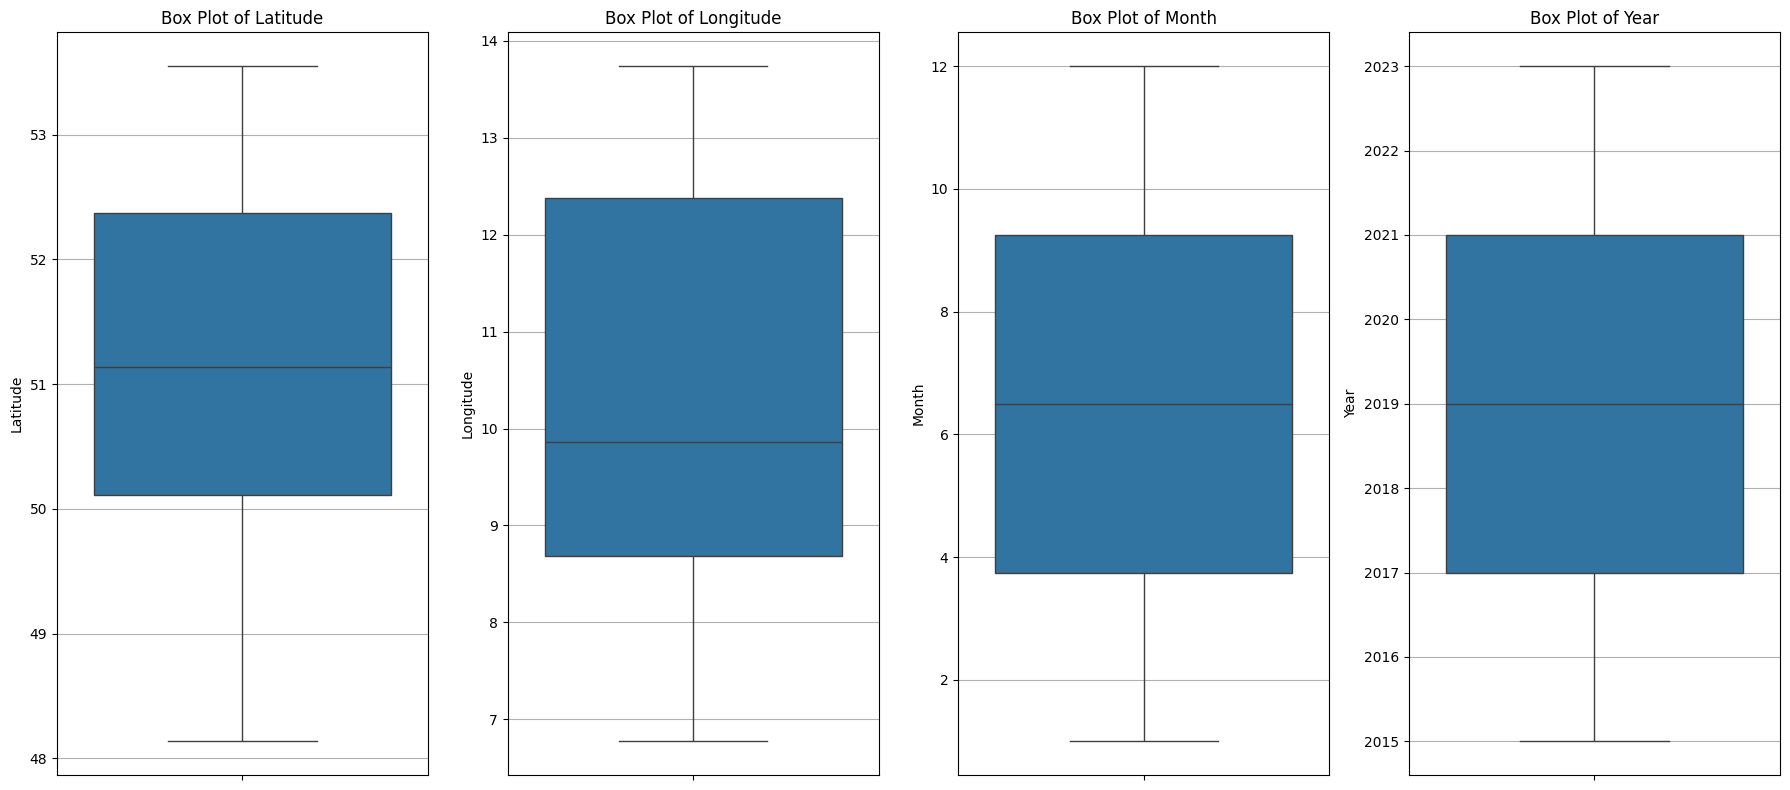

In [88]:
eda_columns = [
    'Latitude',
    'Longitude',
    'Month',
    'Year'
]

plt.figure(figsize=(18, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)

    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [89]:
#checking null values
df.isna().sum()

,0
City,0
Latitude,0
Longitude,0
Month,0
Year,0
Rainfall,0
Elevation,0
Climate_Type,0
Temperature,0
Humidity,0


In [90]:
#unique values
df.nunique()

,0
City,10
Latitude,10
Longitude,10
Month,12
Year,9
Rainfall,1038
Elevation,9
Climate_Type,2
Temperature,372
Humidity,70


In [91]:
#duplicate values
df.duplicated().sum()

0

In [92]:
df.dtypes
#types of data


,0
City,object
Latitude,float64
Longitude,float64
Month,int64
Year,int64
Rainfall,float64
Elevation,int64
Climate_Type,object
Temperature,float64
Humidity,int64


In [93]:
df2=df.drop(['City'],axis=1)
df2.head()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity
0,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


In [94]:
#selecting columns with object datatypes
string_columns = df2.select_dtypes(include=['object'])
string_columns.head()

,Climate_Type
0,Oceanic
1,Oceanic
2,Oceanic
3,Oceanic
4,Oceanic


In [95]:
df2['Climate_Type'].unique()

array(['Oceanic', 'Continental'], dtype=object)

In [96]:
df2['Climate_Type'].value_counts()

,count
Climate_Type,
Oceanic,648
Continental,432


In [97]:
climate_type_variables = pd.get_dummies(df2['Climate_Type'], dtype=int)
climate_type_variables.head()

,Continental,Oceanic
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [98]:
updated_df = pd.concat([df2, climate_type_variables], axis=1)
updated_df.head()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity,Continental,Oceanic
0,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,0,1
1,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,0,1
2,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,0,1
3,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,0,1
4,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,0,1


In [99]:
updated_df.shape

(1080, 11)

In [100]:
updated_df = updated_df.drop('Climate_Type', axis=1)
updated_df.head()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity,Continental,Oceanic
0,52.52,13.405,1,2015,71.56,34,19.6,72,0,1
1,52.52,13.405,2,2015,129.56,34,31.4,88,0,1
2,52.52,13.405,3,2015,24.58,34,15.4,61,0,1
3,52.52,13.405,4,2015,177.73,34,15.1,62,0,1
4,52.52,13.405,5,2015,100.62,34,-3.0,57,0,1


In [101]:
data = updated_df
data.head()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity,Continental,Oceanic
0,52.52,13.405,1,2015,71.56,34,19.6,72,0,1
1,52.52,13.405,2,2015,129.56,34,31.4,88,0,1
2,52.52,13.405,3,2015,24.58,34,15.4,61,0,1
3,52.52,13.405,4,2015,177.73,34,15.1,62,0,1
4,52.52,13.405,5,2015,100.62,34,-3.0,57,0,1


In [102]:
data.shape

(1080, 10)

# **Model Implementation**

In [103]:
X = data.drop('Rainfall', axis=1)
y = data['Rainfall']

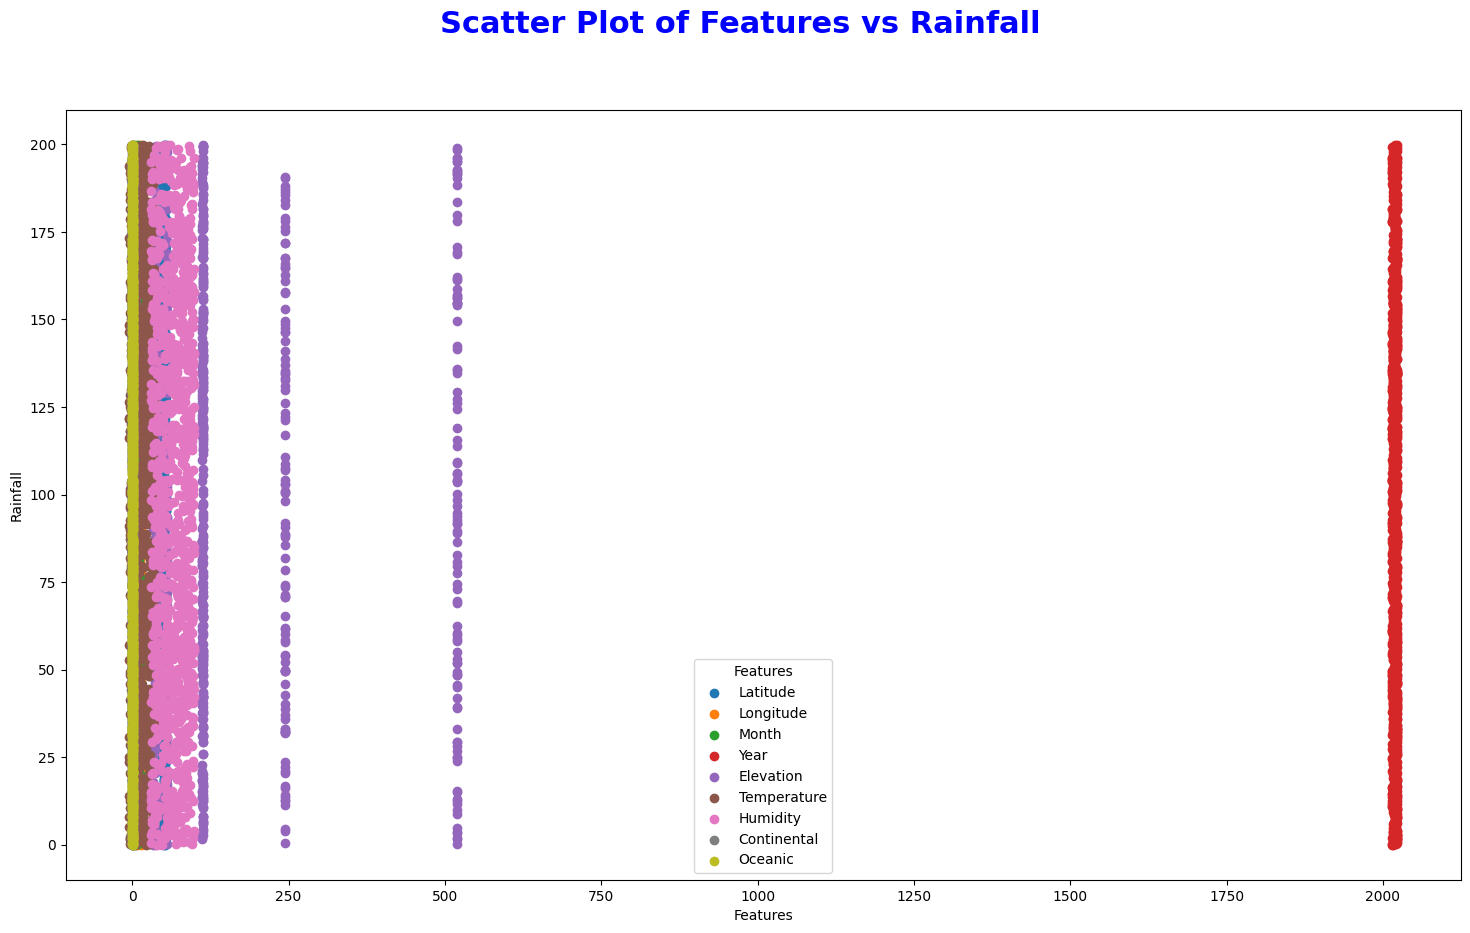

In [117]:
features = X
fig, ax = plt.subplots(figsize=(18, 10))

# Loop over each feature and plot
for feature in features:
    ax.scatter(x=data[feature], y=data["Rainfall"], label=feature)

# Set labels, limits, and ticks
ax.set(xlabel="Features", ylabel="Rainfall")

# Customize the plot
ax.legend(title="Features")

ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

fig.suptitle(t="Scatter Plot of Features vs Rainfall",
             color="blue",
             fontsize=22,
             fontweight="bold")

# Display the plot
plt.show()
